In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.ticker import ScalarFormatter
import plotly.express as px
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import gmean
from scipy.interpolate import Rbf
from scipy.interpolate import griddata

np.warnings.filterwarnings('ignore')
%matplotlib inline

# 1 Visualización de los Datos

In [2]:
carpeta_origen = "C:/Users/UserPro/Py_Geochemistry_Geophysic/"
archivo1 = "Mag_JS_ZN_v2.csv"
Mag= pd.read_csv(carpeta_origen + archivo1, sep=";")

Mag.head()

,East_PSAD56,North_PSAD56,Z1,Z2,Z3,Z4,Z5,Z6
0,480826.09,8322653.27,945.90,23475.42,24587.6,1112.18,10.0,24587.44
1,480827.69,8322651.38,945.92,23475.30,24578.1,1102.80,10.0,24578.06
2,480829.30,8322649.36,945.94,23475.14,24576.9,1101.76,10.0,24577.02
3,480831.05,8322647.43,945.96,23474.98,24586.0,1111.02,10.0,24586.28
4,480832.93,8322645.50,945.98,23474.90,24588.5,1113.60,10.0,24588.86


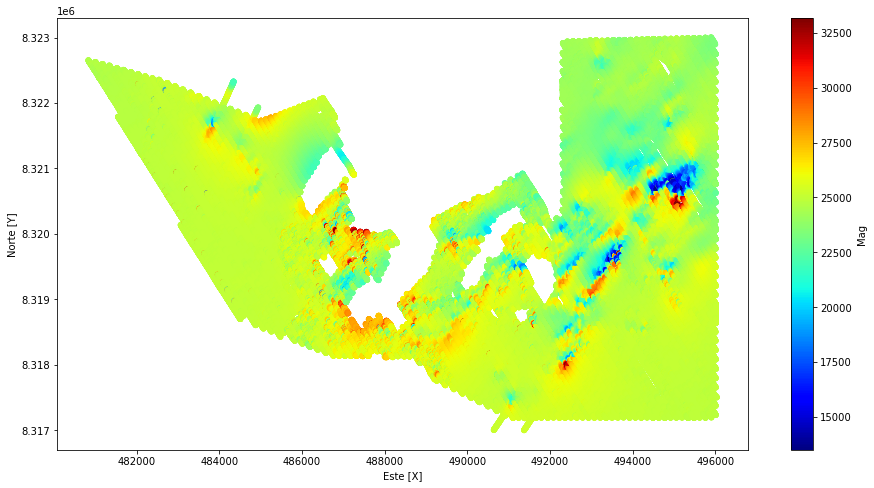

In [25]:
plt.subplot(111)
plt.scatter(Mag["East_PSAD56"], Mag["North_PSAD56"], c=Mag["Z6"], s=25, marker="o", cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label("Mag", labelpad=+5)
plt.xlabel("Este [X]")
plt.ylabel("Norte [Y]")
plt.subplots_adjust(left=0, bottom=0, right=2, top=1.5, wspace=0, hspace=0)
plt.show()

# 2 Selección de Variables

In [4]:
Vtargets = ["Z6"]
Vstats = Mag[Vtargets]
Vstats.describe()

,Z6
count,310904.000000
mean,24707.368989
std,1399.814406
min,13499.120000
25%,24163.095000
50%,24949.860000
75%,25365.160000
max,33188.060000


# 3 Análisis univariado

# 3.1 Estadística descriptiva

Min:  13499.12
Max:  33188.06
Rango:  19688.939999999995
Kurtosis:  8.84
Asimetría:  -1.38
Media:  24707.37
Media Geo:  24664.74
Varianza:  1959480.37
Dstd:  1399.81
CV:  0.06
Cuartil 1:  24163.09
Mediana:  24949.86
Cuartil 3:  25365.16


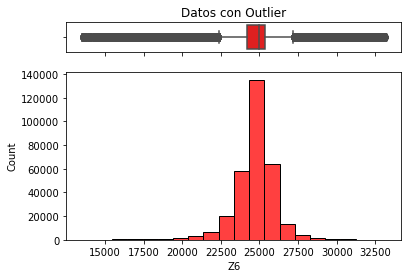

In [6]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(Vstats["Z6"], ax=ax_box, color="red")
sns.histplot(data=Vstats, x="Z6", ax=ax_hist, bins="sturges", color="red")
ax_box.set(title='Datos con Outlier')
ax_box.set(xlabel='')

print("Min: ", Vstats["Z6"].min())
print("Max: ", Vstats["Z6"].max())
print("Rango: ", Vstats["Z6"].max()-Vstats["Z6"].min())


print("Kurtosis: ", round(Vstats["Z6"].kurt(),2))
print("Asimetría: ", round(Vstats["Z6"].skew(),2))
print("Media: ", round(Vstats["Z6"].mean(),2))
print("Media Geo: ", round(gmean(Vstats["Z6"]),2))
print("Varianza: ", round(Vstats["Z6"].var(),2))
print("Dstd: ", round((Vstats["Z6"].var())**0.5,2))
print("CV: ", round(((Vstats["Z6"].var())**0.5)/Vstats["Z6"].mean(),2))

print("Cuartil 1: ", round(np.percentile(Vstats["Z6"],25),2))
print("Mediana: ", round(np.percentile(Vstats["Z6"],50),2))
print("Cuartil 3: ", round(np.percentile(Vstats["Z6"],75),2))


plt.show()

# 3.2 Calculando Outliers

In [29]:
Vstats["Z6"].mean()+3*(Vstats["Z6"].var())**0.5

28906.812208318006

In [28]:
Vstats["Z6"].mean()+2*(Vstats["Z6"].var())**0.5

27506.997802027272

In [7]:
Vstats["Z6"].mean()+(Vstats["Z6"].var())**0.5

26107.183395736538

In [30]:
Vstats["Z6"].mean()

24707.368989445804

In [10]:
Vstats["Z6"].mean()-(Vstats["Z6"].var())**0.5

23307.55458315507

In [11]:
Vstats["Z6"].mean()-2*(Vstats["Z6"].var())**0.5

21907.740176864336

In [12]:
Vstats["Z6"].mean()-3*(Vstats["Z6"].var())**0.5

20507.9257705736

In [13]:
Vstats_Filter=Vstats.drop(Vstats[Vstats.Z6>28910].index)
Vstats_Filter=Vstats_Filter.drop(Vstats[Vstats.Z6<20500].index)

In [14]:
Vstats_Filter.describe()

,Z6
count,304848.000000
mean,24772.702027
std,1108.675061
min,20500.680000
25%,24200.640000
50%,24957.360000
75%,25365.472500
max,28907.160000


Min:  20500.68
Max:  28907.16
Rango:  15408.039999999999
Kurtosis:  1.64
Asimetría:  -0.46
Media:  24772.7
Media Geo:  24747.44
Varianza:  1229160.39
Dstd:  1108.68
CV:  0.04
Cuartil 1:  24200.64
Mediana:  24957.36
Cuartil 3:  25365.47


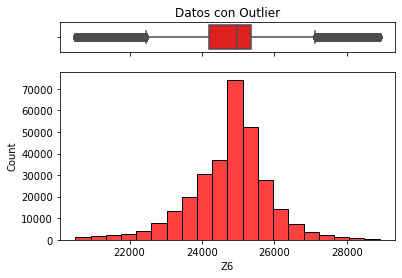

In [15]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(Vstats_Filter["Z6"], ax=ax_box, color="red")
sns.histplot(data=Vstats_Filter, x="Z6", ax=ax_hist, bins="sturges", color="red")
ax_box.set(title='Datos con Outlier')
ax_box.set(xlabel='')

print("Min: ", Vstats_Filter["Z6"].min())
print("Max: ", Vstats_Filter["Z6"].max())
print("Rango: ", Vstats_Filter["Z6"].max()-Vstats["Z6"].min())


print("Kurtosis: ", round(Vstats_Filter["Z6"].kurt(),2))
print("Asimetría: ", round(Vstats_Filter["Z6"].skew(),2))
print("Media: ", round(Vstats_Filter["Z6"].mean(),2))
print("Media Geo: ", round(gmean(Vstats_Filter["Z6"]),2))
print("Varianza: ", round(Vstats_Filter["Z6"].var(),2))
print("Dstd: ", round((Vstats_Filter["Z6"].var())**0.5,2))
print("CV: ", round(((Vstats_Filter["Z6"].var())**0.5)/Vstats["Z6"].mean(),2))

print("Cuartil 1: ", round(np.percentile(Vstats_Filter["Z6"],25),2))
print("Mediana: ", round(np.percentile(Vstats_Filter["Z6"],50),2))
print("Cuartil 3: ", round(np.percentile(Vstats_Filter["Z6"],75),2))


plt.show()

In [17]:
Vstats_Filter["Z6"].mean()+3*(Vstats_Filter["Z6"].var())**0.5

28098.727211315356

In [18]:
Vstats_Filter["Z6"].mean()+2*(Vstats_Filter["Z6"].var())**0.5

26990.052149918014

In [19]:
Vstats_Filter["Z6"].mean()+(Vstats_Filter["Z6"].var())**0.5

25881.377088520672

In [20]:
Vstats_Filter["Z6"].mean()

24772.70202712333

In [21]:
Vstats_Filter["Z6"].mean()-(Vstats_Filter["Z6"].var())**0.5

23664.02696572599

In [22]:
Vstats_Filter["Z6"].mean()-2*(Vstats_Filter["Z6"].var())**0.5

22555.351904328647

In [23]:
Vstats_Filter["Z6"].mean()-3*(Vstats_Filter["Z6"].var())**0.5

21446.676842931305

# 3.6 Visualización de Anomalías

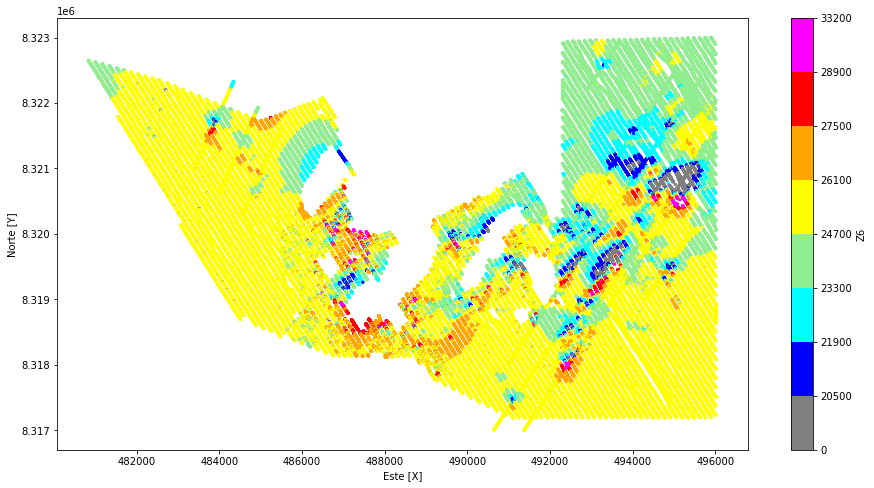

In [31]:
cmap = colors.ListedColormap(['gray', 'blue','cyan', 'lightgreen', 'yellow','orange', 'red','fuchsia'])
boundaries = [0.0, 20500, 21900, 23300, 24700, 26100, 27500, 28900, 33200]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

plt.subplot(111)
plt.scatter(Mag["East_PSAD56"], Mag["North_PSAD56"], c=Mag["Z6"], s=5, marker="o", cmap=cmap, norm=norm)
cbar = plt.colorbar()
cbar.set_label("Z6", labelpad=+5)
plt.xlabel("Este [X]")
plt.ylabel("Norte [Y]")
plt.subplots_adjust(left=0, bottom=0, right=2, top=1.5, wspace=0, hspace=0)
plt.show()

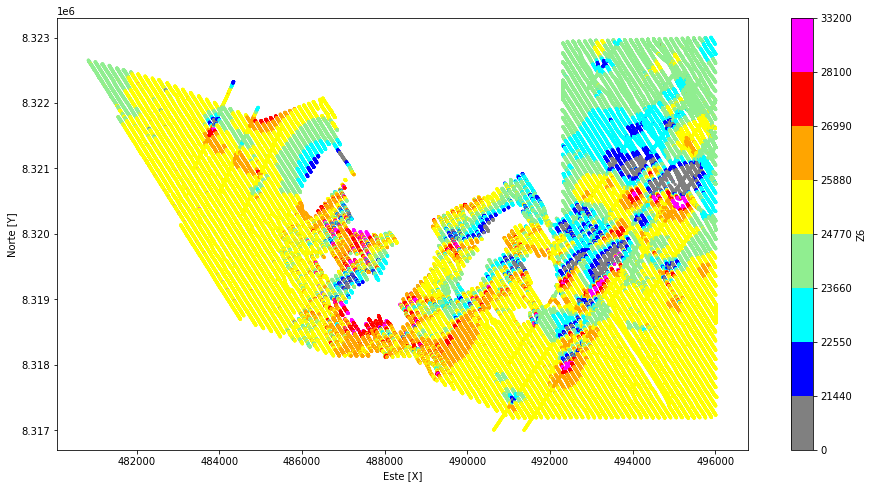

In [27]:
cmap = colors.ListedColormap(['gray', 'blue','cyan', 'lightgreen', 'yellow','orange', 'red','fuchsia'])
boundaries = [0.0, 21440, 22550, 23660, 24770, 25880, 26990, 28100, 33200]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

plt.subplot(111)
plt.scatter(Mag["East_PSAD56"], Mag["North_PSAD56"], c=Mag["Z6"], s=5, marker="o", cmap=cmap, norm=norm)
cbar = plt.colorbar()
cbar.set_label("Z6", labelpad=+5)
plt.xlabel("Este [X]")
plt.ylabel("Norte [Y]")
plt.subplots_adjust(left=0, bottom=0, right=2, top=1.5, wspace=0, hspace=0)
plt.show()

In [32]:
Mag_Filter=Mag.drop(Mag[Mag.East_PSAD56<492000].index)

In [33]:
Mag_Filter.describe()

,East_PSAD56,North_PSAD56,Z1,Z2,Z3,Z4,Z5,Z6
count,160766.000000,1.607660e+05,160766.000000,160766.000000,160766.000000,160766.000000,160766.000000,160766.000000
mean,494388.061567,8.320483e+06,778.063066,23494.548805,24335.606823,841.058018,8.873363,24316.318018
std,1122.809001,1.636654e+03,40.770276,53.410413,1488.751256,1488.716642,1.070915,1488.716642
min,492000.000000,8.317188e+06,647.900000,23407.500000,13481.800000,-9976.140000,6.000000,13499.120000
25%,493452.000000,8.319108e+06,754.252500,23451.000000,23834.700000,318.900000,8.000000,23794.160000
50%,494634.000000,8.320856e+06,777.410000,23474.080000,24561.300000,1032.510000,9.000000,24507.770000
75%,495325.810000,8.321889e+06,798.680000,23547.500000,25095.200000,1615.880000,10.000000,25091.140000
max,496037.000000,8.323001e+06,910.380000,23588.500000,33168.900000,9712.800000,11.000000,33188.060000


Min:  13499.12
Max:  33188.06
Rango:  19688.939999999995
Kurtosis:  9.22
Asimetría:  -1.81
Media:  24316.32
Media Geo:  24266.08
Varianza:  2216277.24
Dstd:  1488.72
CV:  0.06
Cuartil 1:  23794.16
Mediana:  24507.77
Cuartil 3:  25091.14


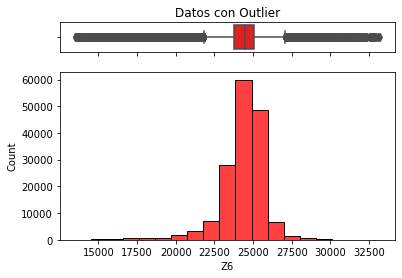

In [34]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(Mag_Filter["Z6"], ax=ax_box, color="red")
sns.histplot(data=Mag_Filter, x="Z6", ax=ax_hist, bins="sturges", color="red")
ax_box.set(title='Datos con Outlier')
ax_box.set(xlabel='')

print("Min: ", Mag_Filter["Z6"].min())
print("Max: ", Mag_Filter["Z6"].max())
print("Rango: ", Mag_Filter["Z6"].max()-Vstats["Z6"].min())


print("Kurtosis: ", round(Mag_Filter["Z6"].kurt(),2))
print("Asimetría: ", round(Mag_Filter["Z6"].skew(),2))
print("Media: ", round(Mag_Filter["Z6"].mean(),2))
print("Media Geo: ", round(gmean(Mag_Filter["Z6"]),2))
print("Varianza: ", round(Mag_Filter["Z6"].var(),2))
print("Dstd: ", round((Mag_Filter["Z6"].var())**0.5,2))
print("CV: ", round(((Mag_Filter["Z6"].var())**0.5)/Vstats["Z6"].mean(),2))

print("Cuartil 1: ", round(np.percentile(Mag_Filter["Z6"],25),2))
print("Mediana: ", round(np.percentile(Mag_Filter["Z6"],50),2))
print("Cuartil 3: ", round(np.percentile(Mag_Filter["Z6"],75),2))


plt.show()

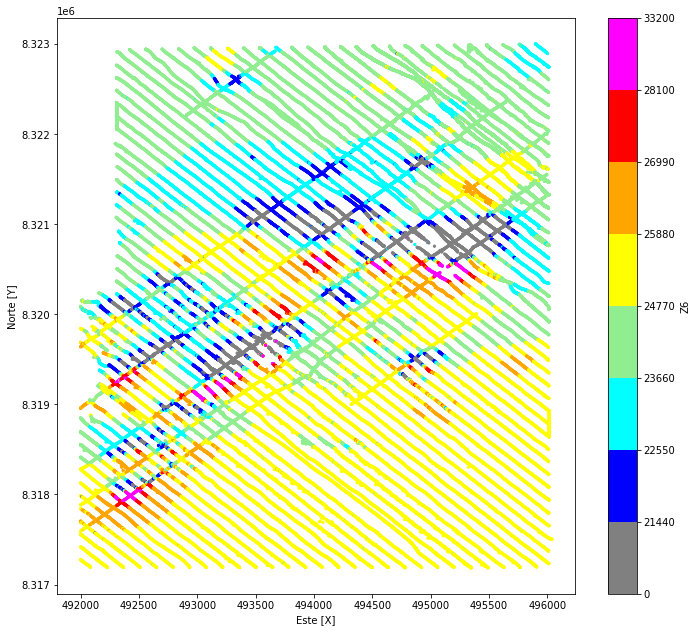

In [38]:
cmap = colors.ListedColormap(['gray', 'blue','cyan', 'lightgreen', 'yellow','orange', 'red','fuchsia'])
boundaries = [0.0, 21440, 22550, 23660, 24770, 25880, 26990, 28100, 33200]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

plt.subplot(111)
plt.scatter(Mag_Filter["East_PSAD56"], Mag_Filter["North_PSAD56"], c=Mag_Filter["Z6"], s=5, marker="o", cmap=cmap, norm=norm)
cbar = plt.colorbar()
cbar.set_label("Z6", labelpad=+5)
plt.xlabel("Este [X]")
plt.ylabel("Norte [Y]")
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=2, wspace=0, hspace=0)
plt.show()

In [39]:
Mag_Filter["Z6"].mean()+3*(Mag_Filter["Z6"].var())**0.5

28782.467943782103

In [40]:
Mag_Filter["Z6"].mean()+2*(Mag_Filter["Z6"].var())**0.5

27293.751301997752

In [41]:
Mag_Filter["Z6"].mean()+1*(Mag_Filter["Z6"].var())**0.5

25805.034660213398

In [42]:
Mag_Filter["Z6"].mean()

24316.318018429047

In [43]:
Mag_Filter["Z6"].mean()-1*(Mag_Filter["Z6"].var())**0.5

22827.601376644696

In [44]:
Mag_Filter["Z6"].mean()-2*(Mag_Filter["Z6"].var())**0.5

21338.88473486034

In [45]:
Mag_Filter["Z6"].mean()-3*(Mag_Filter["Z6"].var())**0.5

19850.16809307599

In [53]:
Mag_Filter2=Mag_Filter.drop(Mag_Filter[Mag_Filter.Z6<19850].index)

Min:  19850.46
Max:  33188.06
Rango:  19688.939999999995
Kurtosis:  3.35
Asimetría:  -0.22
Media:  24432.95
Media Geo:  24403.64
Varianza:  1412615.04
Dstd:  1188.53
CV:  0.05
Cuartil 1:  23846.06
Mediana:  24532.65
Cuartil 3:  25097.96


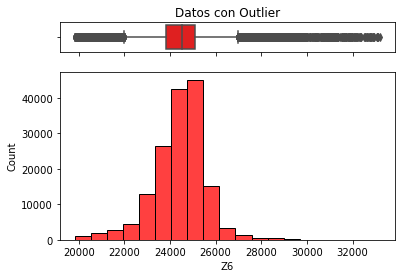

In [54]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(Mag_Filter2["Z6"], ax=ax_box, color="red")
sns.histplot(data=Mag_Filter2, x="Z6", ax=ax_hist, bins="sturges", color="red")
ax_box.set(title='Datos con Outlier')
ax_box.set(xlabel='')

print("Min: ", Mag_Filter2["Z6"].min())
print("Max: ", Mag_Filter2["Z6"].max())
print("Rango: ", Mag_Filter2["Z6"].max()-Vstats["Z6"].min())


print("Kurtosis: ", round(Mag_Filter2["Z6"].kurt(),2))
print("Asimetría: ", round(Mag_Filter2["Z6"].skew(),2))
print("Media: ", round(Mag_Filter2["Z6"].mean(),2))
print("Media Geo: ", round(gmean(Mag_Filter2["Z6"]),2))
print("Varianza: ", round(Mag_Filter2["Z6"].var(),2))
print("Dstd: ", round((Mag_Filter2["Z6"].var())**0.5,2))
print("CV: ", round(((Mag_Filter2["Z6"].var())**0.5)/Vstats["Z6"].mean(),2))

print("Cuartil 1: ", round(np.percentile(Mag_Filter2["Z6"],25),2))
print("Mediana: ", round(np.percentile(Mag_Filter2["Z6"],50),2))
print("Cuartil 3: ", round(np.percentile(Mag_Filter2["Z6"],75),2))


plt.show()

In [55]:
Mag_Filter2["Z6"].mean()+3*(Mag_Filter2["Z6"].var())**0.5

27998.55779261243

In [56]:
Mag_Filter2["Z6"].mean()+2*(Mag_Filter2["Z6"].var())**0.5

26810.022963024785

In [57]:
Mag_Filter2["Z6"].mean()+1*(Mag_Filter2["Z6"].var())**0.5

25621.48813343714

In [59]:
Mag_Filter2["Z6"].mean()

24432.953303849496

In [60]:
Mag_Filter2["Z6"].mean()-1*(Mag_Filter2["Z6"].var())**0.5

23244.418474261853

In [61]:
Mag_Filter2["Z6"].mean()-2*(Mag_Filter2["Z6"].var())**0.5

22055.883644674206

In [62]:
Mag_Filter2["Z6"].mean()-3*(Mag_Filter2["Z6"].var())**0.5

20867.34881508656

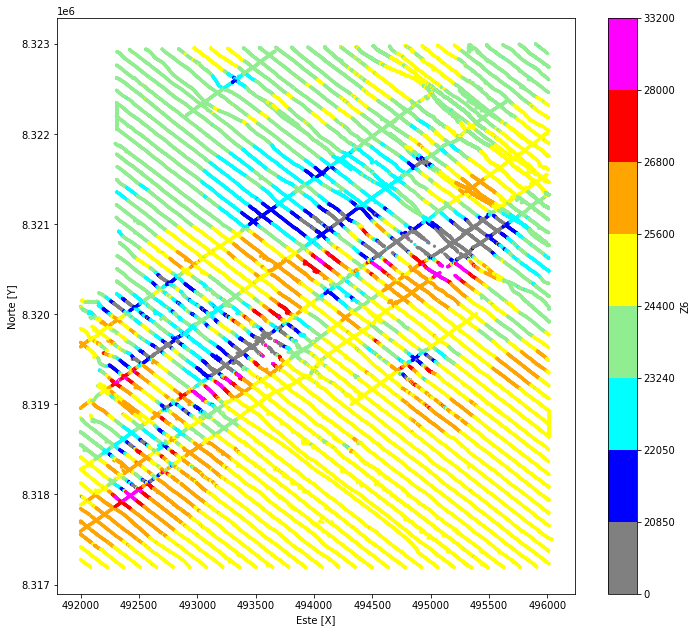

In [63]:
cmap = colors.ListedColormap(['gray', 'blue','cyan', 'lightgreen', 'yellow','orange', 'red','fuchsia'])
boundaries = [0.0, 20850, 22050, 23240, 24400, 25600, 26800, 28000, 33200]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)

plt.subplot(111)
plt.scatter(Mag_Filter["East_PSAD56"], Mag_Filter["North_PSAD56"], c=Mag_Filter["Z6"], s=5, marker="o", cmap=cmap, norm=norm)
cbar = plt.colorbar()
cbar.set_label("Z6", labelpad=+5)
plt.xlabel("Este [X]")
plt.ylabel("Norte [Y]")
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=2, wspace=0, hspace=0)
plt.show()

Min:  13481.8
Max:  33175.3
Rango:  19693.500000000004
Kurtosis:  9.05
Asimetría:  -1.42
Media:  24707.43
Media Geo:  24665.06
Varianza:  1944638.72
Dstd:  1394.5
CV:  0.06


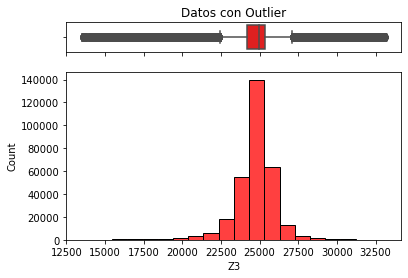

In [67]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(Mag["Z3"], ax=ax_box, color="red")
sns.histplot(data=Mag, x="Z3", ax=ax_hist, bins="sturges", color="red")
ax_box.set(title='Datos con Outlier')
ax_box.set(xlabel='')

print("Min: ", Mag["Z3"].min())
print("Max: ", Mag["Z3"].max())
print("Rango: ", Mag["Z3"].max()-Mag["Z3"].min())


print("Kurtosis: ", round(Mag["Z3"].kurt(),2))
print("Asimetría: ", round(Mag["Z3"].skew(),2))
print("Media: ", round(Mag["Z3"].mean(),2))
print("Media Geo: ", round(gmean(Mag["Z3"]),2))
print("Varianza: ", round(Mag["Z3"].var(),2))
print("Dstd: ", round((Mag["Z3"].var())**0.5,2))
print("CV: ", round(((Mag["Z3"].var())**0.5)/Mag["Z3"].mean(),2))


plt.show()